# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | A serious medical problem a...
1,✅ Trip Verified | I haven't flown British Air...
2,Not Verified | My itinerary was supposed to b...
3,✅ Trip Verified | Busy day at LHR and flight ...
4,✅ Trip Verified | Worst seats I have ever enco...


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
print(df.head())

                                             reviews
0  ✅ Trip Verified |  A serious medical problem a...
1  ✅ Trip Verified |  I haven't flown British Air...
2  Not Verified |  My itinerary was supposed to b...
3  ✅ Trip Verified |  Busy day at LHR and flight ...
4  ✅ Trip Verified | Worst seats I have ever enco...


In [7]:
print(df)

                                               reviews
0    ✅ Trip Verified |  A serious medical problem a...
1    ✅ Trip Verified |  I haven't flown British Air...
2    Not Verified |  My itinerary was supposed to b...
3    ✅ Trip Verified |  Busy day at LHR and flight ...
4    ✅ Trip Verified | Worst seats I have ever enco...
..                                                 ...
995  ✅ Trip Verified |  Gatwick to Faro. Club check...
996  ✅ Trip Verified |  Jeddah to Chicago via Londo...
997  ✅ Trip Verified |  London to Frankfurt. I need...
998  ✅ Trip Verified | Gatwick to Malaga. When book...
999  ✅ Trip Verified |  Bermuda to Gatwick. Usual w...

[1000 rows x 1 columns]


In [8]:
print(df[0:10])

                                             reviews
0  ✅ Trip Verified |  A serious medical problem a...
1  ✅ Trip Verified |  I haven't flown British Air...
2  Not Verified |  My itinerary was supposed to b...
3  ✅ Trip Verified |  Busy day at LHR and flight ...
4  ✅ Trip Verified | Worst seats I have ever enco...
5  Not Verified | Top Ten REASONS to not use Brit...
6  Not Verified |  Easy check in on the way to He...
7  ✅ Trip Verified |  Online check in worked fine...
8  ✅ Trip Verified |. The BA first lounge at Term...
9  Not Verified | Paid a quick visit to Nice yest...


In [10]:
import csv

# Assuming your dataset is stored in a CSV file
filename = "data/BA_reviews.csv"

# Read the CSV file
with open(filename, "r") as file:
    reader = csv.reader(file)
    dataset = list(reader)

# Remove the header and unwanted text from each row
processed_dataset = []
for row in dataset[1:]:  # Exclude the header row
    processed_row = row[1].split("|")[-1].strip()  # Split the row by "|" and keep the second part
    processed_dataset.append(processed_row)


In [11]:
dff = pd.DataFrame(processed_dataset)
dff

,0
0,A serious medical problem appeared while I was...
1,I haven't flown British Airways before and wil...
2,My itinerary was supposed to be Las Vegas-Chic...
3,Busy day at LHR and flight full. Lounge crowde...
4,Worst seats I have ever encountered in economy...
...,...
995,Gatwick to Faro. Club check in at Gatwick is v...
996,Jeddah to Chicago via London. The flight from ...
997,London to Frankfurt. I need to fly BA for Busi...
998,"Gatwick to Malaga. When booking the tickets, I..."


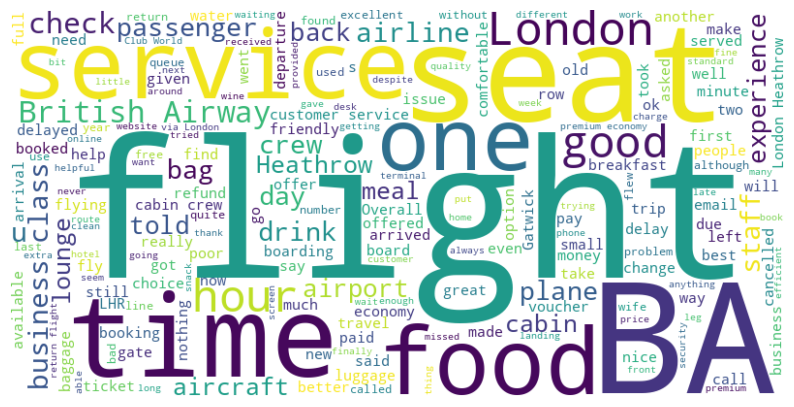

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join all the processed rows into a single string
text = " ".join(processed_dataset)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each processed row
sentiments = []
for row in processed_dataset:
    sentiment = sia.polarity_scores(str(row))['compound']
    sentiments.append(sentiment)

# Calculate the overall sentiment of the dataset
average_sentiment = sum(sentiments) / len(sentiments)

# Print the sentiment analysis results
print("Sentiments:")
for i, sentiment in enumerate(sentiments):
    print(f"Row {i+1}: {sentiment}")

print("\nOverall Average Sentiment:", average_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pranav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiments:
Row 1: -0.7717
Row 2: -0.804
Row 3: -0.9246
Row 4: 0.9795
Row 5: -0.9349
Row 6: -0.9296
Row 7: -0.0516
Row 8: 0.8479
Row 9: -0.1289
Row 10: 0.9763
Row 11: -0.9746
Row 12: -0.9668
Row 13: -0.789
Row 14: -0.7011
Row 15: 0.8898
Row 16: 0.8782
Row 17: -0.7894
Row 18: -0.9824
Row 19: -0.5719
Row 20: -0.8519
Row 21: -0.868
Row 22: -0.4541
Row 23: -0.9455
Row 24: -0.7476
Row 25: -0.8604
Row 26: -0.8537
Row 27: 0.9714
Row 28: -0.8055
Row 29: 0.1015
Row 30: -0.96
Row 31: -0.851
Row 32: 0.9176
Row 33: -0.9372
Row 34: -0.5883
Row 35: -0.9392
Row 36: -0.5033
Row 37: -0.8984
Row 38: 0.8802
Row 39: -0.7097
Row 40: 0.1655
Row 41: -0.9148
Row 42: 0.9615
Row 43: -0.9601
Row 44: -0.9747
Row 45: 0.2635
Row 46: 0.9878
Row 47: 0.998
Row 48: -0.9669
Row 49: -0.1935
Row 50: 0.4588
Row 51: -0.674
Row 52: -0.8841
Row 53: -0.9554
Row 54: -0.9443
Row 55: -0.848
Row 56: 0.9739
Row 57: -0.7351
Row 58: -0.0616
Row 59: -0.6808
Row 60: -0.8957
Row 61: 0.9927
Row 62: -0.9275
Row 63: -0.743
Row 64: -0.8608


In [18]:
# it means overall sentiment is near to 1. So it is slightly positive.